<a href="https://colab.research.google.com/github/Omkale13/Email-Spam-Classification/blob/main/Spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

data = pd.read_csv("spam_or_not_spam.csv")

data = data.fillna("")

X = data['email']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

X_train.sort_indices()
X_test.sort_indices()

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 786ms/step - accuracy: 0.8864 - loss: 0.3995 - val_accuracy: 0.9937 - val_loss: 0.0511
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 75s 680ms/step - accuracy: 0.9924 - loss: 0.0568 - val_accuracy: 0.9958 - val_loss: 0.0286
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 80s 644ms/step - accuracy: 0.9965 - loss: 0.0186 - val_accuracy: 0.9958 - val_loss: 0.0164
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 627ms/step - accuracy: 0.9953 - loss: 0.0109 - val_accuracy: 0.9979 - val_loss: 0.0110
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 565ms/step - accuracy: 0.9984 - loss: 0.0047 - val_accuracy: 0.9979 - val_loss: 0.0087
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 617ms/step - accuracy: 0.9983 - loss: 0.0034 - val_accuracy: 0.9958 - val_loss: 0.0077
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 552ms/step - accuracy: 0.9974 - loss: 0.0031 - val_accuracy: 0.9958 - val_loss: 0.0072
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 44s 601ms/step - accuracy: 0.9987 - loss: 0.0018 - val_accu

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

new_data = pd.read_csv("/content/spam_or_not_spam.csv")

new_data = new_data.fillna("")

X_new = vectorizer.transform(new_data['email'])

X_new.sort_indices()

predictions = model.predict(X_new)

predicted_labels = (predictions > 0.5).astype(int)
predicted_labels = ['spam' if label == 1 else 'not spam' for label in predicted_labels]

new_data['predicted_label'] = predicted_labels

print(new_data[['email', 'predicted_label']])


94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step
                                                  email predicted_label
0      date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...        not spam
1     martin a posted tassos papadopoulos the greek ...        not spam
2     man threatens explosion in moscow thursday aug...        not spam
3     klez the virus that won t die already the most...        not spam
4      in adding cream to spaghetti carbonara which ...        not spam
...                                                 ...             ...
2995   abc s good morning america ranks it the NUMBE...            spam
2996   hyperlink hyperlink hyperlink let mortgage le...            spam
2997   thank you for shopping with us gifts for all ...            spam
2998   the famous ebay marketing e course learn to s...            spam
2999   hello this is chinese traditional 子 件 NUMBER世...            spam

[3000 rows x 2 columns]


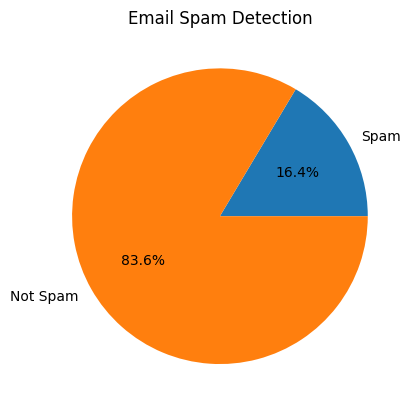

In [3]:
import matplotlib.pyplot as plt

# Get the counts of each label
spam_count = len([label for label in predicted_labels if label == 'spam'])
not_spam_count = len([label for label in predicted_labels if label == 'not spam'])

#pie chart
plt.pie([spam_count, not_spam_count], labels=['Spam', 'Not Spam'], autopct='%1.1f%%')
plt.title('Email Spam Detection')
plt.show()